# 📌 Proposta

Com base em dados de HCV (https://archive.ics.uci.edu/ml/datasets/HCV+data#), realizar o pré-processamento e comparar o resultado entre **dois** algoritmos supervisionados: rede neural artificial e árvore de decisão 

O objetivo do projeto é classificar doadores de sangue em suspeitos e não suspeitos, em relação ao seu sangue destinado à doação, após o treinamento e validação do modelo. Ou seja, classificar casos de suspeita que não foram utilizados no treinamento/validação para analisar o comportamento obtido com cada algoritmo.


## 📑 Metodologia 

**⚫ Pré-processamento**

1. **Categorização de atributos;**
    1. Váriável independente, Label "Sex".
    2. Variável dependente, Label "Category".
2. **Análise da correlação;**
3. **Análise de dados duplicados;**
4. **Análise de dados ausentes;**
5. **Análise de outlier com boxplot;**
6. **Normalização dos dados;**
    1. Robust Scaler.
7. **Divisão das amostras da base em dataset de casos confiáveis e suspeitos;**
8. **Balanceamento dos dados;**
9. **Divisão do dataset dos casos confiáveis em amostras para o treinamento e teste da rede neural.**
  

**⚫ Algoritmo 1: Rede Neural Artificial**

1. **Rede Perceptron de multicamadas:**
    1. Uma camada de entrada com 12 neurônios.
    2. Uma camada oculta com 3 neurônios.
    3. Uma camada de saída com 1 neurônio.
2. **Treinamento da rede;**
    1. Otimizador: Adam.
    2. Perda: binary crossentropy.
    3. Métrica: Acurácia.
    4. Épocas: 200.
    5. Batch size: 10.
    6. Validation Split: 0.2
3. **Predição dos resultados do caso de teste;**
4. **Análise e descrição de métricas para os testes: acurácia, especificidade, sensibilidade, matriz de confusão e gráfico de loss.**
4. **Predição dos casos suspeitos.**
5. **Análise entre predição dos casos suspeitos com dataset balanceado e não balanceado.**



**⚫ Algoritmo 2: Árvore de decisão**

1. **Instancia-se o modelo do DecisionTreeClassifier;**
2. **Treinamento do modelo com dados balanceados e não balanceados**
3. **Análise e descrição de métricas para os testes: acurácia, especificidade, sensibilidade, matriz de confusão.**
4. **Predição dos casos suspeitos.**
5. **Comparação da predição entre modelo balanceado e não balanceado.**

## 💻 Implementação da questão 1

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from numpy.random import seed
import tensorflow
SEED=1624
tensorflow.random.set_seed(SEED)

### Importação da base de dados

In [3]:
dataset = pd.read_csv('./hcvdat0.csv', delimiter=',', index_col=0)
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## ➡️ Pré-processamento

#### Codificação da variável independete, atributo "Sex"

In [4]:
dataset['Sex'] = dataset['Sex'].replace({'m': 0, 'f': 1})

In [5]:
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#### Análise de correlação

Nenhum caso relevante de alta correlação, ou seja, nenhum atributo será retirado.

In [6]:
corr = dataset.corr()
corr.style.background_gradient(cmap='cool')


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,0.024544,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
Sex,0.024544,1.000000,-0.146140,0.019825,-0.161868,-0.130891,-0.111177,-0.169111,0.030208,-0.159589,-0.133276,-0.051277
ALB,-0.197498,-0.146140,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.173340,0.019825,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,-0.006021,-0.161868,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.088666,-0.130891,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.032492,-0.111177,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.075093,-0.169111,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,0.125641,0.030208,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,-0.022296,-0.159589,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704


Ordenação dos dados de acordo com o index

In [7]:
dataset["Category"].value_counts().sort_index()


0=Blood Donor             533
0s=suspect Blood Donor      7
1=Hepatitis                24
2=Fibrosis                 21
3=Cirrhosis                30
Name: Category, dtype: int64

### Verificação dos dados duplicados
nenhum caso encontrado

In [8]:
dataset.duplicated().sum()

0

### Verificação de dados nulos
A técnica escolhida para o tratamento dos dados nulos foi a exclusão

In [9]:
dataset.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

### Exclusão dos dados nulos

In [10]:
dataset=dataset.dropna()

In [11]:
dataset.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

### Análise de boxplot e tratamento de outlier
Percebe-se a presneça de muitos outliers em diversas labels

Text(0.5, 1.0, 'Outliers da base não normalizada')

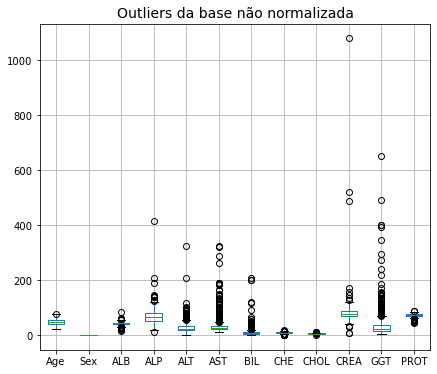

In [12]:
dataset.boxplot(grid=True, figsize= (7,6))
plt.title('Outliers da base não normalizada', fontsize=14)

### Organização dos datasets entre normalizados e não normalizados
Todos os dados referentes as amostras não normalizadas serão acrescidos do sufixo **-orig**. Dessa forma o dataset não normalizado é o dataset_orig.


In [13]:
dataset_orig = dataset

#### Normalização dos dados
Pelo fato da discrepância dos outliers ser alta quando comparado com a mediana dos dados, optou-se por utilizar o Robust Scaler ao invés do Standard. Assim, ele foi aplicado em todas as labels a partir do _Sex_. 

In [14]:
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn_pandas import DataFrameMapper

column_tuples = [
    ('Category', None),
    ('Age', None),
    (['Sex'], None),
    (['ALB'], RobustScaler()),
    (['ALP'], RobustScaler()),
    (['ALT'], RobustScaler()),
    (['AST'], RobustScaler()),
    (['BIL'], RobustScaler()),
    (['CHE'], RobustScaler()),
    (['CHOL'], RobustScaler()),
    (['CREA'], RobustScaler()),
    (['GGT'], RobustScaler()),
    (['PROT'], RobustScaler())
]

mapper = DataFrameMapper(column_tuples, df_out=True)
dataset = mapper.fit_transform(dataset)

dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,0,-0.539683,-0.500000,-0.967742,-0.352941,0.068966,-0.503788,-1.424658,1.380952,-0.486364,-0.525424
2,0=Blood Donor,32,0,-0.539683,0.149635,-0.303226,-0.098039,-0.551724,1.102273,-0.349315,-0.142857,-0.327273,0.745763
3,0=Blood Donor,32,0,0.793651,0.310219,0.870968,2.637255,-0.172414,0.219697,-0.075342,0.428571,0.472727,1.220339
4,0=Blood Donor,32,0,0.206349,-0.518248,0.509677,-0.303922,2.034483,-0.352273,-0.390411,0.142857,0.500000,0.610169
5,0=Blood Donor,32,0,-0.428571,0.288321,0.638710,-0.088235,0.431034,0.337121,-0.678082,-0.047619,0.322727,-0.576271


Text(0.5, 1.0, 'Outliers da base normalizada')

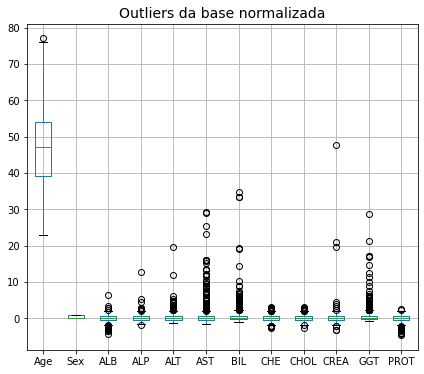

In [15]:
dataset.boxplot(grid=True, figsize= (7,6))
plt.title('Outliers da base normalizada', fontsize=14)

### Divisão do dataset em dados de entrada (x) e de saída (y)
Nesta divisão as variáveis independentes são salvas em x e a dependente em y.
Para o caso dos dados não normalizados foram utilizadas as variáveis x_orig e y_orig.

In [16]:
x = dataset.iloc[:, 1:].values
x_orig = dataset_orig.iloc[:, 1:].values

In [17]:
y = dataset.iloc[:, 0:1].values


In [18]:
#dimensão dos dados
x.shape

(589, 12)

### Codificação da Variável Dependente
Inicialmente todos os 4 rótulos do atributo _category_ foram codificados de string para números inteiros de 0-4, onde:
- 0: Blood Donor
- 1: Suspect Blood Donor
- 2: Hepatitis
- 3: Fibrosis
- 4: Cirrhosis


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


C:\Users\sarah.andrade\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Em seguida, foi realizada uma nova análise dos rótulos com o intuito de identificar quais deles eram referentes aos casos: 
- Suspect Blood Donor (-1)
- Blood Donor (0)
- No Blood Donor (1)

Nesta etapa também é realizada a indexação das posições referentes as amostras dos casos suspeitos

In [21]:
i=0
suspect_index=[]
for i in range(0,len(y)):
    if(y[i]==1):
        y[i]=-1
        suspect_index.append(i)
    if(y[i]>=2):
        y[i]=1

### Divisão do dataset entre casos supeitos e casos confiáveis
Com a utilização do array dos index das amostras suspeitas é realizada uma cópia dos atributos dessas amostras, as quais são armazenadas em x_suspect. E, de modo subsequente, todas os dados dos casos suspeitos são apagados do dataset x e y. 

In [22]:
print(suspect_index)

[526, 527, 528, 529, 530, 531, 532]


In [23]:
#Cópia dos dados x das amostras suspeitas para um novo array 
x_suspect=[0]*len(suspect_index)
x_suspect_orig =[0]*len(suspect_index)

for i in range (0, len(suspect_index)):
    x_suspect[i]=x[suspect_index[i]] #Salva os valores dos casos suspeitos em um array separado
    x_suspect_orig[i]=x_orig[suspect_index[i]]
    
x_suspect=np.array(x_suspect)#Converte a lista para numpy
x_suspect_orig=np.array(x_suspect_orig)


### Rótulos da base sem os casos suspeitos
Retirada dos valores suspeitos do y

In [24]:

y = np.delete(y, suspect_index, axis=0)
print("Y dos doadores e não doadores:\n", y)


Y dos doadores e não doadores:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### Exclusão dos atributos dos casos suspeitos do dataset confiável

In [25]:
x = np.delete(x, suspect_index, axis=0)
x_orig = np.delete(x_orig, suspect_index, axis=0)


### Balanceamento dos dados
Técnica utilizada: Undersampling  

O conjunto x é reduzido para que os números de casos rotulados como não doadores de sangue seja igual ao dos doadores

In [26]:
### Undersampling
from imblearn.under_sampling import RandomUnderSampler

y_orig=y
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=SEED)
x, y = undersample.fit_resample(x, y)

x_orig, y_orig = undersample.fit_resample(x_orig, y_orig)

In [27]:
#Dados balanceados
print(len(x))
print(len(y))

print(len(x_orig))
print(len(y_orig))

112
112
112
112


### Dividindo a base confiável em amostras de treinamento e teste
Conjunto normalizado: X_train, X_test, y_train e y_test  
Conjunto não normalizado: X_train_orig, X_test_orig, y_train_orig e y_test_orig  

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(x_orig, y, test_size = 0.2, random_state = 0)


## ➡️ Algoritmo 1: Rede Neural Artificial - Perceptron Multilayers

### Construção da Rede Neural

In [29]:
ann = tf.keras.models.Sequential()
ann_orig = tf.keras.models.Sequential()

### Adicionando neurônios e camadas

In [30]:
#Camada de entrada
ann.add(tf.keras.layers.Dense(units=12, activation='relu')) #Modelo normalizado
ann_orig.add(tf.keras.layers.Dense(units=12, activation='relu'))#Modelo n-normalizado

In [31]:
#Camada oculta
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))#Modelo normalizado
ann_orig.add(tf.keras.layers.Dense(units=3, activation='relu'))#Modelo n-normalizado

In [32]:
#Camada de saída
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))#Modelo normalizado
ann_orig.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))#Modelo n-normalizado

### Treinando a Rede

In [33]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#Modelo normalizado
ann_orig.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#Modelo n-normalizado

In [34]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
history_orig = ann.fit(X_train_orig, y_train_orig, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

### Predição dos resultados e métricas do modelo

In [35]:
#Normalizado
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred= np.multiply(y_pred, 1)

In [36]:
#N-Normalizado
y_pred_orig = ann.predict(X_test_orig)
y_pred_orig = (y_pred_orig > 0.5)
y_pred_orig= np.multiply(y_pred_orig, 1)

#### Matriz de Confusão

In [37]:
#Normalizado
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 1 11]]


In [38]:
#N-Normalizado
from sklearn.metrics import confusion_matrix, accuracy_score
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
print(cm_orig)

[[10  1]
 [ 1 11]]


#### Sensibilidade

In [39]:
#Normalizado
sensibilidade_norm =cm[1][1] / (cm[0][1]+cm[1][1])
print(sensibilidade_norm)

1.0


In [40]:
#N-Normalizado
sensibilidade_n_norm = cm_orig[1][1] / (cm_orig[0][1]+cm_orig[1][1])
print(sensibilidade_n_norm)

0.9166666666666666


#### Especificidade

In [41]:
#Normalizado
esp_norm = cm[0][0] / (cm[0][0]+cm[1][0])
print(esp_norm)

0.9166666666666666


In [42]:
#N-Normalizado
esp_n_norm = cm_orig[0][0] / (cm_orig[0][0]+cm_orig[1][0])
print(esp_n_norm)

0.9090909090909091


#### Acurácia

In [43]:
#Normalizada
acc= accuracy_score(y_test, y_pred)
acc

0.9565217391304348

In [44]:
#N-normalizada
acc_orig=accuracy_score(y_test_orig, y_pred_orig)
acc_orig

0.9130434782608695

### 📈 Análise Gráfica do loss do modelo
A análise do loss é fundamental em um modelo de rede neural pois ele indica se o modelo utilizado possuiu algum tipo de overfitting ou underfitting. Abaixo são plotados gráficos do loss referetes ao modelo com dados balanceados e não balanceados. Pode-se perceber que os dados balanceados apresentaram uma curva de perda ideal, enquanto não balanceado indica uma possibilidade de underfitting no modelo. Porém, como a taxa de variação da perda dele é muito baixa, a aprendizagem do modelo está dentro dos padrões normais de perda.

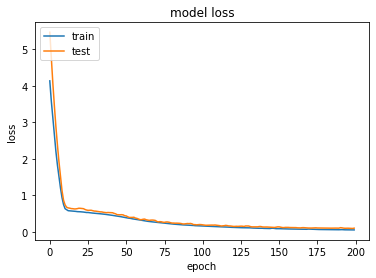

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

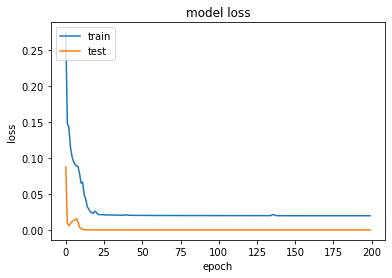

In [46]:
plt.plot(history_orig.history['loss'])
plt.plot(history_orig.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ✅ Resultados
A Tabela abaixo compara os resultados obtidos no modelo da rede neural com as amostras de dados normalizados e não normalizados. Pode-se perceber que a normalizaçãoo nos dados aumentou o potencial de acerto do modelo, tornando a sua sensibilidade, especificidade e acurácia maior do que o outro



|          Métricas   |Normalizado         | Não normalizado
:---------: | :------: | :-------:
|Sensibilidade     | 100%  | 91.6%           
|Especificidade    | 91.6%  | 90.9%     
|Acurácia    | 95.6%  | 91.3%    

### Classificação dos casos suspeitos

In [47]:
y_pred_suspect = ann.predict(np.array(x_suspect))
y_pred_suspect = (y_pred_suspect>0.5)
y_pred_suspect= np.multiply(y_pred_suspect, 1)


In [48]:
y_pred_suspect_orig = ann_orig.predict(np.array(x_suspect_orig))
y_pred_suspect_orig = (y_pred_suspect_orig>0.5)
y_pred_suspect_orig= np.multiply(y_pred_suspect_orig, 1)
print("    Dados Balanceados:", y_pred_suspect.T)
print("Dados Não Balanceados:", y_pred_suspect_orig.T)
print("\nClassificação dos casos suspeitos")


    Dados Balanceados: [[0 0 0 0 0 0 0]]
Dados Não Balanceados: [[0 0 0 0 0 0 0]]

Classificação dos casos suspeitos




|          Caso suspeito   |Dados balanceados         | Não balanceados
:----------------: | :----------------: | :---------------:
|1                 | Doador de sangue   | Doador de sangue           
|2                 | Doador de sangue   | Doador de sangue     
|3                 | Doador de sangue   | Doador de sangue  
|4                 | Doador de sangue   | Doador de sangue           
|5                 | Doador de sangue   | Doador de sangue    
|6                 | Doador de sangue   | Doador de sangue  
|7                 | Doador de sangue   | Doador de sangue   

Apesar dos resultados ilustrados na Tabela das métricas, a classificação dos casos supeitos foi idêntica nos dois padrões do dataset, normalizados e não normalizados. Todos os casos foram classificados como possíveis doadores de sangue.

## ➡️ Algoritmo 2: Árvore de decisão

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = DecisionTreeClassifier(random_state = SEED)

### Treinamento da árvore

In [51]:
clf = clf.fit(X_train,y_train)

### Predição dos resultados e métricas do modelo

In [52]:
arvore_prediction = clf.predict(X_test)

#### Matriz de confusão

In [53]:
#Normalizada
cm = confusion_matrix(y_test, arvore_prediction)
cm

array([[11,  0],
       [ 2, 10]], dtype=int64)

#### Sensibilidade

In [54]:
#Normalizada
print (cm[1][1] / (cm[0][1]+cm[1][1]))

1.0



#### Especificidade


In [55]:
#Normalizada
print (cm[0][0] / (cm[0][0]+cm[1][0]))

0.8461538461538461


#### Acurácia

In [56]:
#Normalizada
import sklearn.metrics as metrics
accuracy_score(y_test, arvore_prediction)
print(metrics.classification_report(y_test,arvore_prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.83      0.91        12

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23



## ✅ Resultados
A Tabela abaixo compara os resultados obtidos no modelo da árvore de decisão com as amostras de dados normalizados e não normalizados. Pode-se perceber que a normalizaçãoo nos dados não interferiu no resultado das métricas, como esperado, devido a questão da impureza no seu funcionamento. No entanto, os resultados obtidos foram satisfatórios. 


|          Métricas   |Normalizado         | 
:---------: | :------: 
|Sensibilidade     | 100%  |          
|Especificidade    | 84.61%  |   
|Acurácia    | 91%  |     

### Classificação dos casos suspeitos com árvore de decisão

In [57]:
arvore_pred_suspect = clf.predict(x_suspect)
arvore_pred_suspect = (arvore_pred_suspect>0.5)
arvore_pred_suspect = np.multiply(arvore_pred_suspect, 1)

In [58]:
print(arvore_pred_suspect)
print("\nLegenda:\n 0 = Doador de sangue,  1 = Não doador de sangue")

[0 0 0 0 1 0 0]

Legenda:
 0 = Doador de sangue,  1 = Não doador de sangue




|          Caso suspeito   |Dados balanceados         | 
:----------------: | :----------------: 
|1                 | Doador de sangue   |         
|2                 | Doador de sangue   |     
|3                 | Doador de sangue   | 
|4                 | Doador de sangue   |         
|5                 | Não Doador    |   
|6                 | Doador de sangue   | 
|7                 | Doador de sangue   |    

A classificação dos casos supeitos

# 🆚 Comparação entre resultados da ANN e arvore de decisão
No geral, a classificação dos dois algoritmos obtiveram bons resultados durante o teste do seu treinamento, no entanto na predição dos casos suspeitos o algoritmo da ávore classificou a 5ª amostra do caso suspeito como sendo não doador. Essa foi a única divergência encontrada durante a comparação dos resultados.


|          Caso suspeito   |ANN Balanceada | Árvore Balanceada | 
:----------------: | :----------------: | :---------------: 
|1                 | Doador de sangue   | Doador de sangue   |        
|2                 | Doador de sangue   | Doador de sangue  |     
|3                 | Doador de sangue   | Doador de sangue |
|4                 | Doador de sangue   | Doador de sangue  |         
|5                 | Doador de sangue | Não Doador   |  
|6                 | Doador de sangue   | Doador de sangue |    
|7                 | Doador de sangue   | Doador de sangue   |   